In [1]:
"""
occusion 恢复不是很理想
增加 hist 的比重
NUM_COLOR_BINS = 128
C = 10 ** -5
with occlusion
sigma_d = 0.2
sigma_v = 1
argmax method
not print free_energy
针对出了图片的点采取特殊处理方式
更改了 hist 的更新方式，为了解决黑边问题
"""

from EMUtils.EM import EM
from EMUtils.config import *
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
em = EM("C:\\Learn\\grade3\\paper_work\\EM\\result\\cone\\with_occlusion_7")

In [3]:
[em.e_and_m() for _ in range(6)]

124
 0 E step finished
covariance: 5.548286949772702

 0 M step finished

 0 save fig successfully in C:\Learn\grade3\paper_work\EM\result\cone\with_occlusion_7
124
 1 E step finished
covariance: 5.34006734006734

 1 M step finished

 1 save fig successfully in C:\Learn\grade3\paper_work\EM\result\cone\with_occlusion_7
124
 2 E step finished
covariance: 5.1909968204384445

 2 M step finished

 2 save fig successfully in C:\Learn\grade3\paper_work\EM\result\cone\with_occlusion_7
124
 3 E step finished
covariance: 5.144145653570132

 3 M step finished

 3 save fig successfully in C:\Learn\grade3\paper_work\EM\result\cone\with_occlusion_7
124
 4 E step finished
covariance: 5.084908826490659

 4 M step finished

 4 save fig successfully in C:\Learn\grade3\paper_work\EM\result\cone\with_occlusion_7
124
 5 E step finished
covariance: 5.021486399417318

 5 M step finished

 5 save fig successfully in C:\Learn\grade3\paper_work\EM\result\cone\with_occlusion_7


[None, None, None, None, None, None]

In [4]:
import numpy as np
from EMUtils import utils
tmp_visible_image = np.zeros([HEIGHT, WIDTH])
tmp_disparity_image = np.zeros([HEIGHT, WIDTH])
for i in range(HEIGHT):
        for j in range(WIDTH):
            index = utils.map_2D_to_1D(i, j)
            disparity = 0
            visibility = 0

            for m in range(num_visible_state):
                r, s = utils.map_m_to_r_s(m)
                disparity += b_mat[index, m] * depth_vec[r]
                visibility += b_mat[index, m] * visibility_conf_mat[s][1]
            
            
            
            nearest_disparity = utils.nearest_int(disparity)
            nearest_visibility = utils.nearest_int(visibility)
            tmp_visible_image[i, j] = nearest_visibility
            tmp_disparity_image[i, j] = nearest_disparity
            new_r = depth_vec.index(nearest_disparity)
            if nearest_visibility == 1:
                new_s = 0
            else:
                new_s = 1

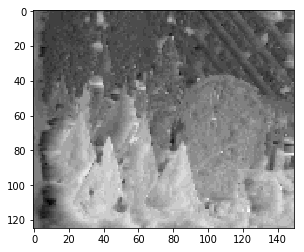

In [5]:
plt.imshow(tmp_disparity_image, cmap="gray")

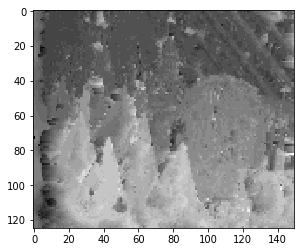

In [6]:
plt.imshow(disparity_image, cmap="gray")

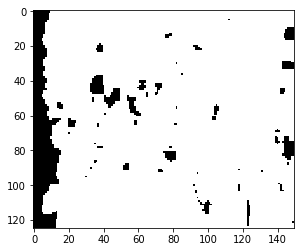

In [7]:
plt.imshow(tmp_visible_image, cmap="gray")

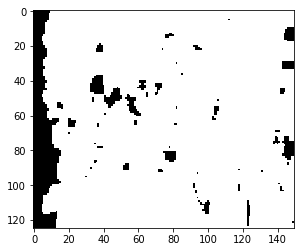

In [8]:
plt.imshow(visible_image, cmap="gray")

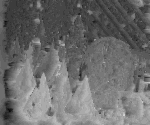

In [13]:
Image.fromarray(tmp_disparity_image.astype('uint8') * 10, "L")

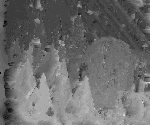

In [14]:
Image.fromarray(disparity_image.astype('uint8') * 10, "L")